In [136]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data from .dta file
file_path = 'CdV_6_MONTHS.ods'
df = pd.read_excel('CdV_6_MONTHS.ods', engine='odf', sheet_name='Sheet1')

# New columns:
df['average_ticket'] = df['wallet_equity'] / df['client_count']
df['supernova'] = df['client_count'].apply(lambda x: 1 if x <= 80 else 0)


# Convert 'month_date' to datetime format
df['month_date'] = pd.to_datetime(df['month_date'], format='%Y-%m')
# Sort the data by 'employee_name' and 'month_date'
df = df.sort_values(by=['employee_name', 'month_date'])
# Create a new column with delayed values
df['done_meetings+1_month'] = df.groupby('employee_name')['done_meetings'].shift(-1)
df['done_meetings+2_month'] = df.groupby('employee_name')['done_meetings'].shift(-2)

# Define the dependent variable and the independent variables
y_subset = ['cap_value']

# Subset Option 1:
#x_subset = ['done_meetings', 'is_male', 'client_count', 'wallet_equity', 'average_ticket', 'supernova', 'done_meetings+1_month', 'done_meetings+2_month'] 

# Subset Option 2:
#x_subset = ['done_meetings', 'is_male', 'client_count', 'wallet_equity', 'supernova', 'done_meetings+1_month', 'done_meetings+2_month'] 

# Subset Option 3:
#x_subset = ['done_meetings', 'is_male', 'client_count', 'average_ticket', 'supernova', 'done_meetings+1_month'] 

# Subset Option 4:
x_subset = ['is_male', 'client_count', 'average_ticket', 'supernova', 'done_meetings+1_month'] 

# Create a list of all columns to check for NaNs
subset_check = y_subset + x_subset

# Drop rows where any of the specified columns have NaN values
df_filtered = df.dropna(subset=subset_check)

# Redefine y and X with the filtered data
y_filtered = df_filtered[y_subset]
X_filtered = df_filtered[x_subset]

# Add a constant to the predictors for the intercept
#X_filtered = sm.add_constant(X_filtered)

# Fit the linear regression model
model = sm.OLS(y_filtered, X_filtered).fit()

# Display a summary of the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              cap_value   R-squared (uncentered):                   0.515
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              14.21
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                    1.79e-09
Time:                        22:10:15   Log-Likelihood:                         -1128.2
No. Observations:                  72   AIC:                                      2266.
Df Residuals:                      67   BIC:                                      2278.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [126]:
# Create log-transformed columns for all variables with a small constant added
small_constant = 1e-6
log_vars = y_subset + x_subset
for var in log_vars:
    df[f'log_{var}'] = np.log(df[var] + small_constant)

# Define the log-transformed dependent variable and the independent variables
log_y_subset = [f'log_{var}' for var in y_subset]
log_x_subset = [f'log_{var}' for var in x_subset]

# Create a list of all columns to check for NaNs
log_subset_check = log_y_subset + log_x_subset

# Drop rows where any of the specified columns have NaN values
df_filtered = df.dropna(subset=log_subset_check)

# Redefine y and X with the log-transformed columns
y_filtered = df_filtered[log_y_subset]
X_filtered = df_filtered[log_x_subset]

# Add a constant to the predictors for the intercept
X_filtered = sm.add_constant(X_filtered)

# Fit the linear regression model
model = sm.OLS(y_filtered, X_filtered).fit()

# Display a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          log_cap_value   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     3.257
Date:                Wed, 10 Jul 2024   Prob (F-statistic):            0.00844
Time:                        22:07:43   Log-Likelihood:                -130.19
No. Observations:                  60   AIC:                             274.4
Df Residuals:                      53   BIC:                             289.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/home/julio/Documents/econometrics-1/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [125]:
import numpy as np

#Print X subset correlation
correlation_matrix = df[x_subset].corr()

# Create a mask to select the upper triangle of the correlation matrix
mask = (correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))).stack()

# Filter correlations greater than 0.80
high_correlations = mask[mask > 0.80]

high_correlations

Series([], dtype: float64)

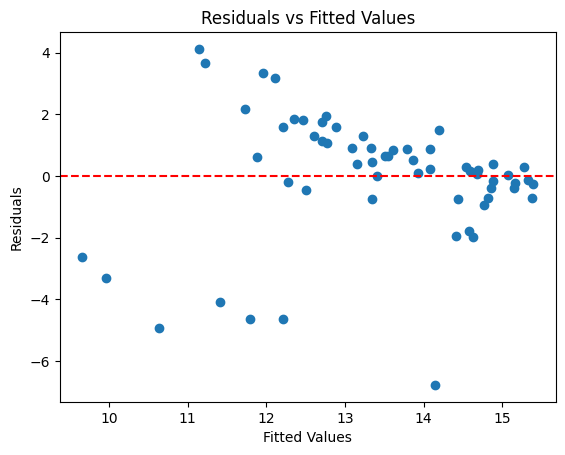

In [115]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have a fitted model named `model`
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [111]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# bp_test returns (Lagrange multiplier statistic, p-value, f-value, f p-value)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(labels, bp_test))

print(bp_results)

{'Lagrange multiplier statistic': 14.765291184109843, 'p-value': 0.005213613861263528, 'f-value': 4.4882073765044765, 'f p-value': 0.0032854295827516398}


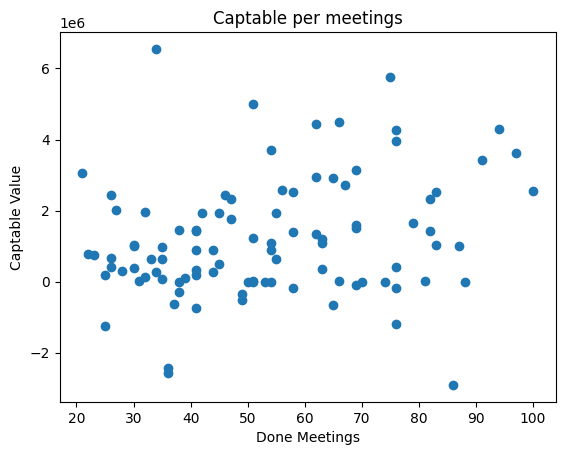

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from .dta file
file_path = 'CdV_6_MONTHS.ods'
df = pd.read_excel('CdV_6_MONTHS.ods', engine='odf', sheet_name='Sheet1')

# Assuming the ODS file has columns named 'x' and 'y'
# Create a scatter plot
plt.scatter(df['done_meetings'], df['cap_value'])

# Add title and labels
plt.title('Captable per meetings')
plt.xlabel('Done Meetings')
plt.ylabel('Captable Value')

# Show plot
plt.show()


In [82]:
import statsmodels.api as sm

# Assuming y_filtered and X_filtered are already defined as in the previous example
model_robust = sm.OLS(y_filtered, X_filtered).fit(cov_type='HC3')
print(model_robust.summary())


                                 OLS Regression Results                                
Dep. Variable:              cap_value   R-squared (uncentered):                   0.416
Model:                            OLS   Adj. R-squared (uncentered):              0.335
Method:                 Least Squares   F-statistic:                              1.468
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                       0.220
Time:                        21:39:46   Log-Likelihood:                         -771.36
No. Observations:                  49   AIC:                                      1555.
Df Residuals:                      43   BIC:                                      1566.
Df Model:                           6                                                  
Covariance Type:                  HC3                                                  
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/home/julio/Documents/econometrics-1/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [59]:
from statsmodels.regression.linear_model import WLS

# Calculate weights as the inverse of the variance of residuals
weights = 1 / (model.resid ** 2)

# Fit the model using Weighted Least Squares
model_wls = WLS(y_filtered, X_filtered, weights=weights).fit()
print(model_wls.summary())


                            WLS Regression Results                            
Dep. Variable:              cap_value   R-squared:                       0.870
Model:                            WLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           2.44e-38
Time:                        21:05:35   Log-Likelihood:                -1425.1
No. Observations:                  96   AIC:                             2862.
Df Residuals:                      90   BIC:                             2878.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.779e+05   1.54e+05  